In [1]:
#!pip install plotly
# Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import plotly.plotly as py
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#For LR
import statsmodels.api as sm
#For LR That looks like R
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
print("Packages LOADED")


Packages LOADED


In [2]:
import os
print(os.getcwd())
os.chdir('E:\data science\AI\Datasets')
print(os.getcwd())

C:\Users\HP
E:\data science\AI\Datasets


In [3]:
data = pd.read_csv('diabetes2.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
!pip install pydot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import xgboost as xgb
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
pd.set_option('display.notebook_repr_html', False)
get_ipython().magic('matplotlib inline')
plt.style.use('seaborn-white')
print("Package Loaded")

Package Loaded


In [6]:
array = data.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
type(array)

numpy.ndarray

In [8]:
X = array[:,0:8] # ivs for train
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y = array[:,8] # dv
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [10]:
test_size = 0.33
from sklearn.model_selection import train_test_split
#pip install -U scikit-learn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
print('Partitioning Done!')

Partitioning Done!


In [11]:
print(y[:10])
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)


[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [12]:
outcome = y_test
print(metrics.accuracy_score(outcome,prediction))

0.7519685039370079


In [13]:
print(metrics.confusion_matrix(y_test,prediction))

[[131  35]
 [ 28  60]]


In [14]:
model.feature_importances_

array([0.04880287, 0.33130885, 0.1362967 , 0.04922744, 0.0414654 ,
       0.19690498, 0.08282655, 0.11316722])

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
outcome = y_test
print(metrics.confusion_matrix(y_test,y_pred))

[[130  36]
 [ 28  60]]


In [16]:
print(metrics.accuracy_score(outcome,y_pred))

0.7480314960629921


In [17]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)   # depth= 4
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred).T, index=decision_tree.classes_,
columns=decision_tree.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       0.0  1.0
Predicted          
0.0        151   45
1.0         15   43


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       166
         1.0       0.74      0.49      0.59        88

   micro avg       0.76      0.76      0.76       254
   macro avg       0.76      0.70      0.71       254
weighted avg       0.76      0.76      0.75       254



In [19]:
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

76.38

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.70


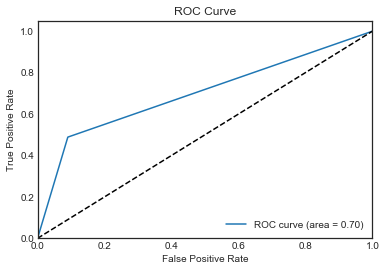

In [21]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)   # depth= 3
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred).T, index=decision_tree.classes_,
columns=decision_tree.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, y_pred))


True       0.0  1.0
Predicted          
0.0        142   36
1.0         24   52
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       166
         1.0       0.68      0.59      0.63        88

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.72      0.73       254
weighted avg       0.76      0.76      0.76       254



In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)


ROC AUC: 0.72


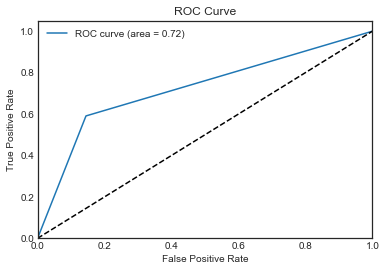

In [24]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

In [25]:
import sklearn
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.7)
print("For Main Data Set :",data["Outcome"].count())

For Main Data Set : 768


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [26]:
print("For Train Set :",train["Outcome"].count())

For Train Set : 537


In [27]:
print("For Test Set :",test["Outcome"].count())
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]

For Test Set : 231


In [28]:
y_train=train["Outcome"]
y_test=test["Outcome"]

In [29]:
cv = KFold(n_splits=10,) # Set a random seed        
# Number of elements          
# Desired number of cv folds

In [30]:
import sklearn
train, test = sklearn.model_selection.train_test_split(data, train_size = 0.7)
print("For Main Data Set :",data["Outcome"].count())
print("For Train Set :",train["Outcome"].count())
print("For Test Set :",test["Outcome"].count())
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
y_train=train["Outcome"]
y_test=test["Outcome"]

For Main Data Set : 768
For Train Set : 537
For Test Set : 231


In [31]:
accuracies = list()
max_attributes = len(list(y_test))
depth_range = range(1, max_attributes + 1)

In [32]:
# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []

In [33]:
tree_model = tree.DecisionTreeClassifier(max_depth = depth)
print("Current max depth: ", depth, "\n")
for train_fold, valid_fold in cv.split(X):
    f_train = train.loc[train_fold] # Extract train data with cv indices
    f_valid = train.loc[valid_fold] # Extract valid data with cv indices




Current max depth:  231 



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [34]:
model = tree_model.fit(x_train,y_train) # We fit the model with the fold train data
valid_acc = model.score(x_test,y_test)# We calculate accuracy with the fold validation data
fold_accuracy.append(valid_acc)

In [35]:
avg = sum(fold_accuracy)/len(fold_accuracy)
accuracies.append(avg)
print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", avg)
print("\n")

Accuracy per fold:  [0.7835497835497836] 

Average accuracy:  0.7835497835497836




In [36]:
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": avg})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1           0.78355
         2           0.78355
         3           0.78355
         4           0.78355
         5           0.78355
         6           0.78355
         7           0.78355
         8           0.78355
         9           0.78355
        10           0.78355
        11           0.78355
        12           0.78355
        13           0.78355
        14           0.78355
        15           0.78355
        16           0.78355
        17           0.78355
        18           0.78355
        19           0.78355
        20           0.78355
        21           0.78355
        22           0.78355
        23           0.78355
        24           0.78355
        25           0.78355
        26           0.78355
        27           0.78355
        28           0.78355
        29           0.78355
        30           0.78355
        31           0.78355
        32           0.78355
        33           0.78355
        34    